In [1]:
pip install mysql # installing the necessary packages

     -------------------------------------- 178.5/178.5 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install mysql-connector-python

     ---------------------------------------- 7.9/7.9 MB 23.9 MB/s eta 0:00:00
     ------------------------------------- 904.1/904.1 kB 28.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### 1. Create a table with a large number of records (you can find it with a google search or use this link - https://github.com/datacharmer/test_db). Use MySQL Database. One can setup MySQL on localhost. Write some basic queries using python. Suppose you want to process/fetch a large number of records using python while keeping your memory usage low. Think of approaches on how to accomplish this and implement it.

In [8]:
import mysql.connector
import pandas as pd
import numpy as np
from pandas import DataFrame as DF 
from warnings import filterwarnings
filterwarnings("ignore")

## user defined function to get a table for sql database with two positional arguments and one default argument

def table_get(q,db,params=None):
        # establish the connection between the sql database and python
    mydb = mysql.connector.connect(host = 'localhost',
                        user = "root",
                        password = "Data@grokr",
                        database = db,
                        buffered = False)
        # nonbuffered connection helps in low memory usage at execution and due to this we have to complete this sql statement before
        # executing any other statement.
        # initializing a sql cursor
    cur = mydb.cursor()
        # user defined nested generator fuction to get one row at a time 
    def get_rows():
        row = cur.fetchone() # cursor points to the first row of the query
        while row is not None:
            yield row
            row = cur.fetchone() # cursor gets updates to next row 
    
    
    cur.execute(q,params) # qurey gets executed 
    table = DF(columns=np.array(cur.description).T[0]) # creation of dataFrame for the query
    for i,r in enumerate(get_rows()): # for loop continuos untill stopitration error
        table.loc[i,:] = r # each row gets added to the dataframe one by one
    return table

In [10]:
# sql qurey to print employees details 
df = table_get("select * from employees where emp_no < %(emp_no)s","employees",{'emp_no':10010}) # fuction call 
df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18


In [13]:
# sql query to get employees with first name starting with G and the last name starting with F
emp = table_get("select * from employees where first_name like 'G%' and last_name like 'F%'","employees")
emp

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,11270,1962-10-10,Gina,Falster,M,1988-09-28
2,12131,1961-02-27,Gregory,Fandrianto,M,1986-10-11
3,12734,1952-03-05,Gil,Frijda,M,1986-03-03
4,12974,1953-08-13,Gift,Frolund,M,1986-10-24
...,...,...,...,...,...,...
505,498167,1954-07-23,Gad,Frezza,F,1990-11-08
506,498809,1961-10-24,Georgi,Ferriere,M,1993-02-21
507,499097,1953-12-07,Guadalupe,Farrow,F,1986-11-29
508,499596,1952-05-03,Gunilla,Falby,F,1987-11-22


In [15]:
# getting all salaries of all employeeis from year 1990
salary = table_get("select * from salaries where year(from_date) = 1990","employees")
salary

,emp_no,salary,from_date,to_date
0,10001,66961,1990-06-25,1991-06-25
1,10004,48271,1990-11-30,1991-11-30
2,10005,82621,1990-09-12,1991-09-12
3,10006,40000,1990-08-05,1991-08-05
4,10007,60740,1990-02-10,1991-02-10
...,...,...,...,...
114556,499984,44489,1990-07-30,1991-07-30
114557,499986,100856,1990-08-10,1991-08-10
114558,499988,79827,1990-07-25,1991-07-25
114559,499992,52539,1990-05-09,1991-05-09


### 2. Define a class Person and its two child classes: Male and Female. All classes have a method "get_gender" which can print "Male" for Male class and "Female" for Female Class.


In [27]:
class Person: # parent class
    def __init__(self,fname,lname,country,state,city):
        self.fname = fname
        self.lname = lname
        self.country = country
        self.state = state
        self.city = city
    def WhoAmI(self):
        print(f"you are {self.fname+self.lname} from {self.country} world ")
    
class Male(Person): # child class
    def __init__(self,fname,lname,country,state,city,chakra):
        Person.__init__(self,fname,lname,country,state,city)
        self.chakra = chakra
        self.gender = "Male"
    
    def get_gender(self):
        print(f"{self.gender} with {self.chakra} nature")
        

class Female(Person):# child class
    def __init__(self,fname,lname,country,state,city):
        Person.__init__(self,fname,lname,country,state,city)
        self.gender = "Female"
    
    def get_gender(self):
        print(self.gender)

In [23]:
n = Person("Naruto","Uzumaki","Anime","Land of fire","HiddenLeaf") # object of a parent class Person
n.WhoAmI() 

you are NarutoUzumaki from Anime world 


In [28]:
naruto = Male("Naruto","Uzumaki","Anime","Land of fire","HiddenLeaf","wind") # object of child class Male
naruto.get_gender()

Male with wind nature


In [21]:
naruto.WhoAmI() # inherited methode of parent class

you are NarutoUzumaki from Anime world 


### 2.b) Make class Person an abstract class and make get_gender an abstract method in the same class. The two child classes must inherit and implement get_gender. i.e., When trying to initialize an object of class Person, the program must throw an error.

In [46]:
from abc import ABC,abstractclassmethod

class Person(ABC): # abstract class using ABC module
    
    def __init__(self,fname,lname,country,state,city):
        self.fname = fname
        self.lname = lname
        self.country = country
        self.state = state
        self.city = city
    
    
    def WhoAmI(self):
        print(f"you are {self.fname+self.lname} from {self.country} world ")
    
    
    @abstractclassmethod  # decorator of abstractmethode
    def get_gender(self):
        pass
    
# child class 
class Male(Person):
    def __init__(self,fname,lname,country,state,city):
        Person.__init__(self,fname,lname,country,state,city) # inheriting parent class methods
        self.gender = "Male"
    
    
    def get_gender(self):
        print(self.gender)
        
        
class Female(Person):
    def __init__(self,fname,lname,country,state,city):
        Person.__init__(self,fname,lname,country,state,city)
        self.gender = "Female"
        
        
    def get_gender(self):
        print(self.gender)

In [49]:
p = Person() # failed to instantiate abstract class

TypeError: Can't instantiate abstract class Person with abstract method get_gender

In [47]:
m = Male("Steven","Rogers","Marvel","New york","Manhattan")
m.get_gender()

Male


In [37]:
f = Female("Natasha","Romanoff","Marvel","Russian","Stalingrad")
f.get_gender()

Female


In [48]:
m.WhoAmI()

you are StevenRogers from Marvel world 


### 3. With a given list [12,24,35,24,88,120,155,88,120,155], write a program to print this list after removing all duplicate values with original order reserved.

In [55]:
original_list = [12,24,35,24,88,120,155,88,120,155]
sorted_list = list(dict.fromkeys(original_list)) # using dick,fromkeys method to retain the order list while removing the duplicates
print("List after removing all duplicate values with original order reserved",sorted_list)

List after removing all duplicate values with original order reserved [12, 24, 35, 88, 120, 155]


### 4. Write a program that can map() to make a list whose elements are squares of numbers between 1 and 20 (both included).

In [53]:
num = [*range(1,21)] # list of 1 to 21
square = list(map(lambda x : x**2,num)) # using map with lambda function that square the numbers
print("The list of Squared numbers from 1 to 21: ",square)

The list of Squared numbers from 1 to 21:  [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


### 5. Write a program anti_html.py that takes a URL as an argument, downloads the HTML from the web, and prints it after stripping HTML tags.

In [60]:
import anti_html # python file with a fuction get_url to read the html of the url and print the content after striping html tags

anti_html.get_url("https://en.wikipedia.org/wiki/Python_(programming_language)")





Python (programming language) - Wikipedia
document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7bfb4d08-1dd9-446f-b350-b9dcf5eb2345","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Python_(programming_language)","wgTitle":"Python (programming language)","wgCurRevisionId":1124289199,"wgRevisionId":1124289199,"wgArticleId":23862,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 maint: archived copy as title","Articles with short description","Short description matches Wikidata","Use dmy dates from November 2021","Articles containing potentially dated stat

## ETL Job:

In [1]:
import pandas as pd 
import numpy as np
from pandas import DataFrame as DF
pd.set_option("display.max_columns",None)

In [2]:
pd.set_option("display.max_colwidth",None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)
plt.rcParams["figure.facecolor"] = "papayawhip"


### 1. Find the average age of developers when they wrote their first line of code.


In [3]:
survey = pd.read_csv("survey_results_public.csv",index_col="Respondent")
survey.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses 

In [9]:
survey.shape

(88883, 84)

In [19]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Hobbyist                88883 non-null  object 
 2   OpenSourcer             88883 non-null  object 
 3   OpenSource              86842 non-null  object 
 4   Employment              87181 non-null  object 
 5   Country                 88751 non-null  object 
 6   Student                 87014 non-null  object 
 7   EdLevel                 86390 non-null  object 
 8   UndergradMajor          75614 non-null  object 
 9   EduOther                84260 non-null  object 
 10  OrgSize                 71791 non-null  object 
 11  DevType                 81335 non-null  object 
 12  YearsCode               87938 non-null  object 
 13  Age1stCode              87634 non-null  object 
 14  YearsCodePro            74331 non-null

In [11]:
q = pd.read_csv("survey_results_schema.csv")
q

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
...,...,...
80,Sexuality,Which of the following do you currently identi...
81,Ethnicity,Which of the following do you identify as? Ple...
82,Dependents,"Do you have any dependents (e.g., children, el..."
83,SurveyLength,How do you feel about the length of the survey...


In [15]:
q[q["Column"]=="Age1stCode"].QuestionText

14    At what age did you write your first line of code or program? (E.g., webpage, Hello World, Scratch project)
Name: QuestionText, dtype: object

In [20]:
survey.Age1stCode.isnull().sum()

1249

In [29]:
list(filter(lambda x: len(x)>2 if x is not np.nan else False,survey.Age1stCode))

['Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Older than 85',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Older than 85',
 'Younger than 5 years',
 'Older than 85',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 years',
 'Younger than 5 year

In [33]:
def age(x):
    if x =="Younger than 5 years":
        return 5
    elif x == "Older than 85":
        return 85
    else:
        return float(x)

In [39]:
t = survey.Age1stCode.apply(age)
t = t.fillna(t.mean())

In [41]:
print(f"The average age of developers when they wrote their first line of code is {t.mean()}")

The average age of developers when they wrote their first line of code is 15.415032978068286


### 2.Deduce the percentage of developers who knew python in each country.


In [48]:
survey.Country.value_counts(normalize=True)*100

United States        23.604241
India                10.209462
Germany               6.609503
United Kingdom        6.464153
Canada                3.825309
                       ...    
Tonga                 0.001127
Timor-Leste           0.001127
North Korea           0.001127
Brunei Darussalam     0.001127
Chad                  0.001127
Name: Country, Length: 179, dtype: float64

In [83]:
survey["prog_lang"] = survey.LanguageWorkedWith.str.split(';')

In [84]:
survey.prog_lang.fillna("not available",inplace=True)
py = survey.Country[survey.prog_lang.apply(lambda x :True if (x is not np.nan) and ("Python" in x ) else False)]
py.value_counts(normalize = True)*100

United States                            27.667865
India                                     8.520155
Germany                                   6.725571
United Kingdom                            6.541723
Canada                                    4.275169
                                           ...    
Timor-Leste                               0.002744
Mali                                      0.002744
Sierra Leone                              0.002744
Liechtenstein                             0.002744
Democratic People's Republic of Korea     0.002744
Name: Country, Length: 162, dtype: float64

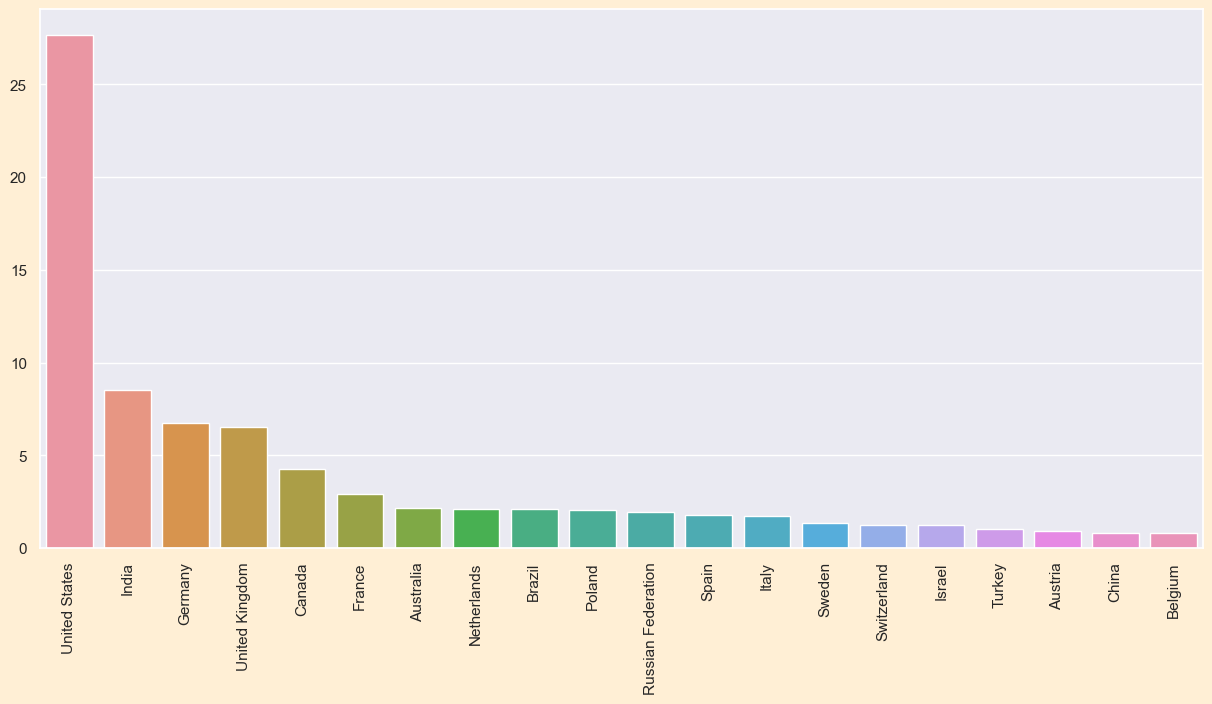

In [85]:
plt.rcParams["figure.figsize"] = (15,7)
p = DF(py.value_counts(normalize=True)*100)
sns.barplot(data = p[:20].T)
plt.xticks(rotation=90);

### 3. Generate the report for the average salary of developers based on the continent

In [70]:
survey.CompFreq.value_counts()

Yearly     31505
Monthly    29057
Weekly      2706
Name: CompFreq, dtype: int64

In [78]:
survey.ConvertedComp.mean()

127110.73842323056

c = pd.read_clipboard()
c

In [65]:
con = c.loc[:,["Afghanistan","Asia"]]
con

,Afghanistan,Asia
0,Åland Islands,Europe
1,Albania,Europe
2,Algeria,Africa
3,American Samoa,Oceania
4,Andorra,Europe
...,...,...
243,Wallis and Futuna Islands,Oceania
244,Western Sahara,Africa
245,Yemen,Asia
246,Zambia,Africa


In [66]:
con.set_index("Afghanistan",drop=True,inplace=True)
con.rename_axis(index="Country",inplace=True)
con.rename(columns={"Asia":"Continent"},inplace=True)
con.reset_index(inplace=True)

In [67]:
con.loc[248,:]=["Afghanistan","Asia"]

In [68]:
con.set_index("Country",drop=True,inplace=True)
con

,Continent
Country,
Åland Islands,Europe
Albania,Europe
Algeria,Africa
American Samoa,Oceania
Andorra,Europe
...,...
Western Sahara,Africa
Yemen,Asia
Zambia,Africa


In [69]:
con.rename({"United Kingdom of Great Britain and Northern Ireland":"United Kingdom"},axis=0,inplace=True)
con.rename({"United States of America":"United States"},axis=0,inplace=True)
con.rename({"Czechia":"Czech Republic"},axis=0,inplace=True)
con.rename({"Iran (Islamic Republic of)":"Iran"},axis=0,inplace=True)
con.rename({"Hong Kong (S.A.R.)":"Iran"},axis=0,inplace=True)

con.loc["South Korea"] = "Asia"
#United States of America
con.loc["Hong Kong (S.A.R.)"] = "Asia"
con.loc['Cape Verde'] = "Africa"
con.loc['Taiwan'] = "Asia"

In [70]:
def con_map(x):
    try :
        return con.loc[x][0]
    except KeyError:
        return "Asia"

    
survey["Continent"] = survey.Country.apply(con_map)

In [71]:
sal_stats = survey.groupby("Continent").ConvertedComp.describe()
sal_stats.style.background_gradient("Greens")

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Africa,1233.000000,34497.952149,93663.173786,0.000000,5856.000000,13140.000000,36024.000000,1000000.000000
Asia,8833.000000,38103.136420,100516.318196,0.000000,6420.000000,13993.000000,32988.000000,2000000.000000
Europe,23725.000000,97116.182129,176312.935347,0.000000,31212.000000,49722.000000,75564.000000,2000000.000000
North America,18010.000000,225667.247418,424320.043960,0.000000,70000.000000,100300.000000,150000.000000,2000000.000000
Oceania,1606.000000,166950.955791,262417.554795,0.000000,55176.000000,76156.000000,108795.000000,1000000.000000
South America,2416.000000,33166.386589,81314.885879,0.000000,10622.000000,19071.500000,32304.000000,2000000.000000


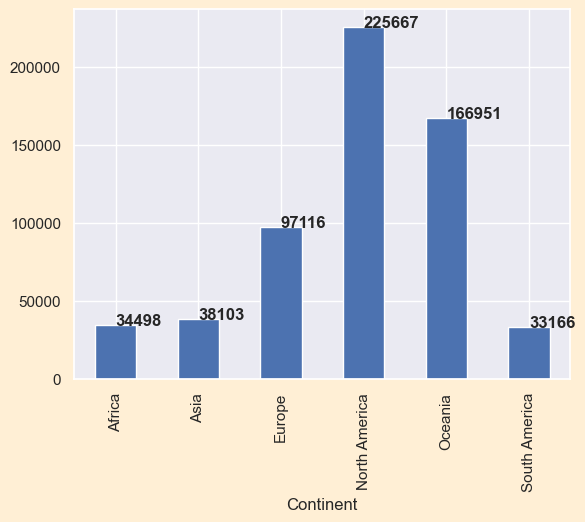

In [72]:
sal = survey.groupby("Continent").ConvertedComp.mean()
sal.plot.bar()
p=0
for i in sal.values:
    plt.text(p,i,str(round(i)),fontweight="bold")
    p+=1
plt.savefig('chart.png');

In [284]:
# 1. Set up multiple variables to store the titles, text within the report
page_title_text='My report on Salary'
title_text = 'Average salary of Programmers'
text = 'Hello, welcome to your report! which tells you about the salary of programmers in different continet'
prices_text = 'statistical summary of salaries'
#stats_text = 'Historical prices summary statistics'


# 2. Combine them together using a long f-string
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <img src='chart.png' width="1000">
            <h2>{prices_text}</h2>
            {sal_stats.to_html()}
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
with open('html_salary_report.html', 'w') as f:
    f.write(html)

### 4. Based on this survey, what will be the most desired programming language for the year 2020?

In [195]:
from collections import Counter

lan = survey[~survey.prog_lang.isnull()].prog_lang
co = Counter(list(itertools.chain.from_iterable(lan.values)))
co

Counter({'C': 11143,
         'C++': 16856,
         'C#': 22449,
         'Go': 17060,
         'HTML/CSS': 36645,
         'Java': 23508,
         'JavaScript': 44739,
         'Python': 40006,
         'SQL': 33566,
         'Elixir': 3788,
         'WebAssembly': 8440,
         'Scala': 5562,
         'Bash/Shell/PowerShell': 21303,
         'Erlang': 2124,
         'Ruby': 7251,
         'Rust': 10497,
         'TypeScript': 23720,
         'Other(s):': 7912,
         'Kotlin': 13261,
         'R': 6734,
         'Assembly': 4659,
         'Objective-C': 2851,
         'PHP': 12837,
         'Swift': 8800,
         'VBA': 1641,
         'Clojure': 2752,
         'Dart': 4429,
         'F#': 3521})

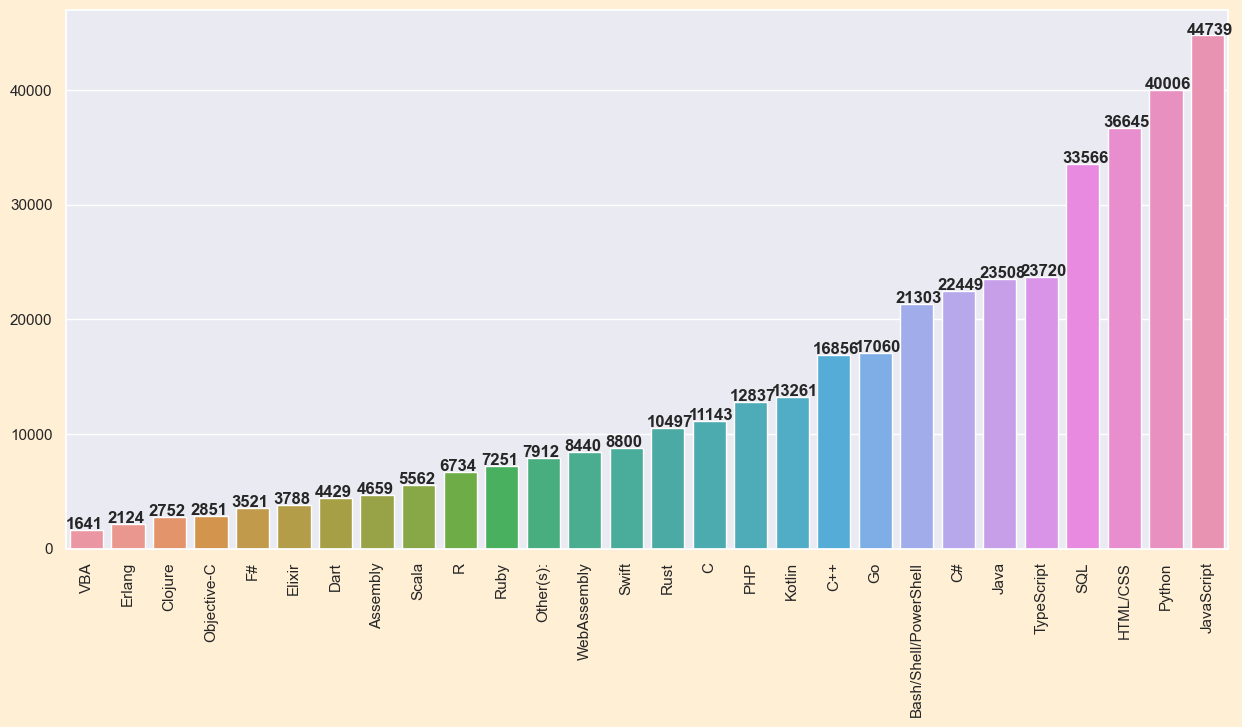

In [232]:
i = list(co.items())
co = dict(sorted(i,key=lambda x: x[1]))
sns.barplot(x= list(co.keys()),y = list(co.values()))
plt.xticks(rotation=90)
p=0
for l,c in co.items():
    plt.text(p-0.5,c+100,str(c),fontweight="bold")
    p+=1
plt.savefig('chart_lang_count.png');

### 5. Generate the report for the people who code as a hobby based on their gender and continent. Note: Please make sure that gender has three categories only MAN, WOMAN, and OTHERS. If a record has a singular/atomic value as MAN or WOMAN then only consider it for gender category MAN and WOMAN respectively, if it has ambiguous value then consider it for OTHERS.

In [234]:
survey.Gender.isnull().sum()

3477

In [242]:
survey.Gender.value_counts()

Man                                                            77919
Woman                                                           6344
Others                                                          3477
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [5]:
survey.Gender.fillna("Others",inplace=True) 

In [6]:
survey["Gender_enc"]= survey.Gender.apply(lambda x:"Others" if len(x)>5 else x) # replacing all other than "Man and Woman" to "Others"
survey["Gender_enc"].value_counts()

Man       77919
Woman      6344
Others     4620
Name: Gender_enc, dtype: int64

In [73]:
temp = survey[survey.Hobbyist == "Yes"]
percent_continent = pd.crosstab(index=temp["Continent"],columns=temp["Gender_enc"],values='Respondent',aggfunc='count',normalize='index')*100
percent_continent

Gender_enc,Man,Others,Woman
Continent,,,
Africa,89.245283,4.905660,5.849057
Asia,87.526213,7.217750,5.256037
Europe,91.243784,3.974525,4.781691
North America,87.202352,5.374816,7.422832
Oceania,89.418778,5.613512,4.967710
South America,93.382639,2.491242,4.126119


In [74]:
percent_gender = pd.crosstab(index=temp["Continent"],columns=temp["Gender_enc"],values='Respondent',aggfunc='count',normalize='columns')*100
percent_gender

Gender_enc,Man,Others,Woman
Continent,,,
Africa,2.973954,2.879291,3.079980
Asia,20.338264,29.540421,19.299553
Europe,42.111633,32.308970,34.873323
North America,27.975919,30.370986,37.630402
Oceania,2.829343,3.128461,2.483855
South America,3.770886,1.771872,2.632886


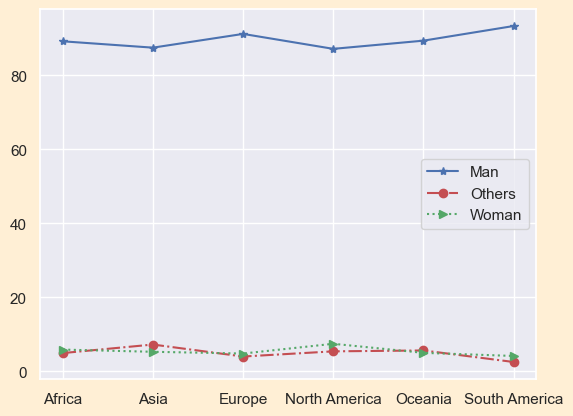

In [75]:
#percent_continent.plot.bar()

plt.plot(percent_continent.index,percent_continent['Man'],color = "b",linestyle = '-',marker = '*')
plt.plot(percent_continent.index,percent_continent['Others'],color = "r",linestyle = '-.',marker = 'o')
plt.plot(percent_continent.index,percent_continent['Woman'],color = "g",linestyle = ':',marker = '>')
plt.legend(percent_continent.columns)
plt.savefig("gen precent on each continent.png");

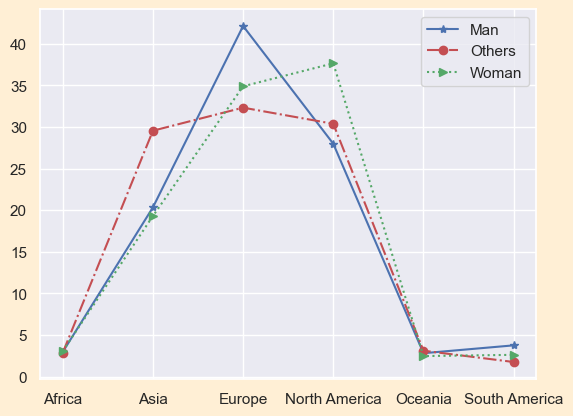

In [76]:
#percent_gender.plot.bar()
#plt.savefig("precent of each gender continent wise.png")
plt.plot(percent_gender.index,percent_gender['Man'],color = "b",linestyle = '-',marker = '*')
plt.plot(percent_gender.index,percent_gender['Others'],color = "r",linestyle = '-.',marker = 'o')
plt.plot(percent_gender.index,percent_gender['Woman'],color = "g",linestyle = ':',marker = '>')
plt.legend(percent_gender.columns);

In [77]:
gen_stats = temp.groupby("Continent").Gender_enc.describe()
gen_stats

,count,unique,top,freq
Continent,,,,
Africa,2120,3,Man,1892
Asia,14783,3,Man,12939
Europe,29362,3,Man,26791
North America,20410,3,Man,17798
Oceania,2013,3,Man,1800
South America,2569,3,Man,2399


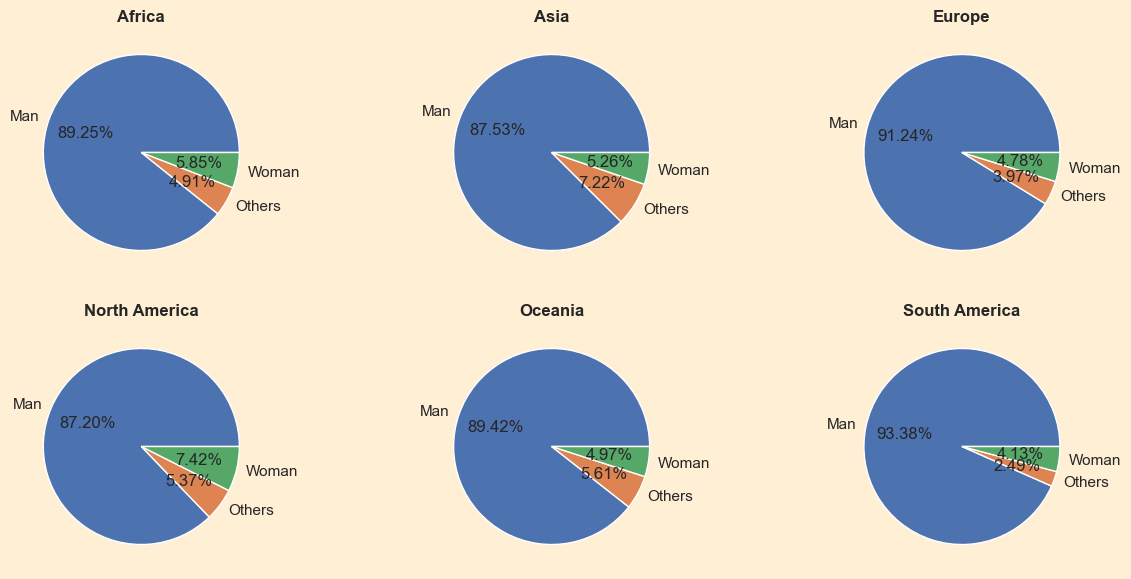

In [79]:
plt.subplots(figsize=(15,7))
p = 1
c = percent_continent.columns
for i in percent_continent.index:
    plt.subplot(2,3,p)
    plt.pie(percent_continent.loc[i,:],labels = c,autopct='%.2f%%')
    plt.title(f"{i}",fontweight="bold")
    p+=1
    plt.savefig("pie_continent_wise.png");

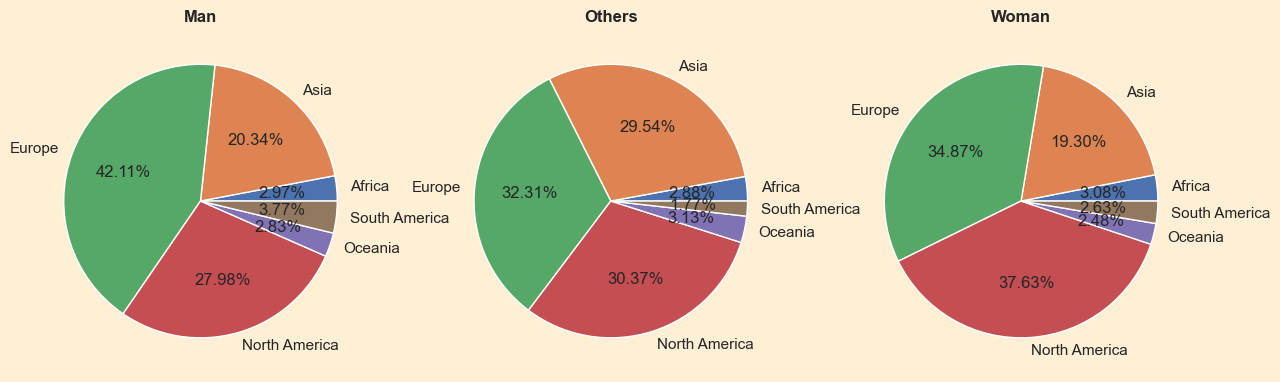

In [80]:
plt.subplots(figsize=(15,7))
p = 1
c = percent_gender.index
for i in percent_gender.columns:
    plt.subplot(1,3,p)
    plt.pie(percent_gender.loc[:,i],labels = c,autopct='%.2f%%')
    plt.title(f"{i}",fontweight="bold")
    p+=1
    plt.savefig("pie_gender_wise.png");

In [81]:
# 1. Set up multiple variables to store the titles, text within the report
page_title_text='My report on Gender'
title_text = 'Report for the people who code as a hobby based on their gender and continent'
text = 'Hello, welcome to your report!'
table_1_text = 'Percentage of people who practice coding as a Hobby in each continent'
table_2_text = 'Percentage of people gender wise who practice coding as a Hobby in across the world continent'
#stats_text = 'Historical prices summary statistics'


# 2. Combine them together using a long f-string
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <h2>{table_1_text}</h2>
            
            {percent_continent.to_html()}
            <img src='gen precent on each continent.png' width="900">
            <h2>{table_2_text}</h2>
            
            {percent_gender.to_html()}
            <img src='precent of each gender continent wise.png' width="900">
            
            <img src='pie_gender_wise.png' width="900">
            
            {gen_stats.to_html()}
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
with open('html_Gender_report.html', 'w') as f:
    f.write(html)

### 6.Generate the report for job and career satisfaction of developers based on their gender and continent. 

In [318]:
survey.JobSat.value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [319]:
survey.CareerSat.value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [15]:
dev = survey[survey.DevType.str.find("Developer")>=0]
dev.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,Gender_enc
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,Man
3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or tool without taking a formal course",100 to 499 employees,"Designer;Developer, back-end;Developer, front-end;Developer, full-stack",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new opportunities",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies I'd be working with;Remote work options;Flex time or a flexible schedule",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what seems most important or urgent,Distracting work environment;Inadequate access to necessary tools;Lack of support from management,Less than once per month / Never,Home,Average,No,NaN,"No, but I think we should",Not sure,I have little or no influence,HTML/CSS,Elixir;HTML/CSS,P

In [17]:
survey.JobSat.value_counts(normalize=True)*100

Slightly satisfied                    34.100130
Very satisfied                        31.627881
Slightly dissatisfied                 15.146222
Neither satisfied nor dissatisfied    12.283766
Very dissatisfied                      6.842001
Name: JobSat, dtype: float64

In [23]:
job_sat = pd.crosstab(columns=dev.Gender_enc,index=dev.JobSat,normalize='columns')*100
job_sat

Gender_enc,Man,Others,Woman
JobSat,,,
Neither satisfied nor dissatisfied,12.386991,14.636076,10.190476
Slightly dissatisfied,15.365722,15.268987,14.880952
Slightly satisfied,34.671730,31.606013,32.166667
Very dissatisfied,6.683854,8.306962,6.690476
Very satisfied,30.891703,30.181962,36.071429


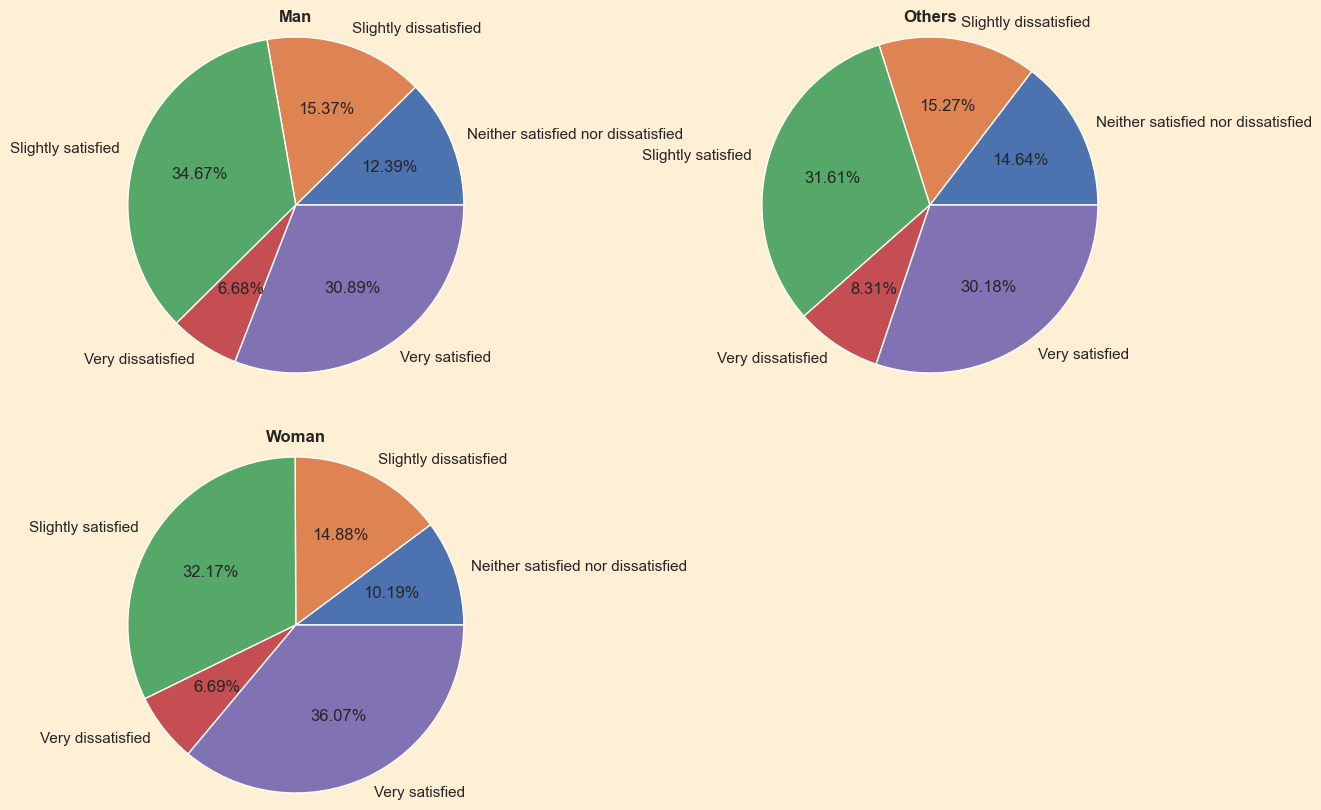

In [42]:
plt.subplots(figsize=(15,10))
p = 1
c = job_sat.index
for i in job_sat.columns:
    plt.subplot(2,2,p)
    plt.pie(job_sat.loc[:,i],labels = c,autopct='%.2f%%',radius=1.2)
    plt.title(f"{i}",fontweight="bold")
    p+=1
    plt.savefig("pie_job_sat.png")
    ;

In [43]:
car_sat = pd.crosstab(columns=dev.Gender_enc,index=dev.CareerSat,normalize='columns')*100
car_sat

Gender_enc,Man,Others,Woman
CareerSat,,,
Neither satisfied nor dissatisfied,9.641596,13.786627,8.838501
Slightly dissatisfied,10.439945,11.682945,11.059695
Slightly satisfied,34.670169,33.395943,34.058306
Very dissatisfied,5.047679,6.386176,4.303563
Very satisfied,40.200611,34.748310,41.739935


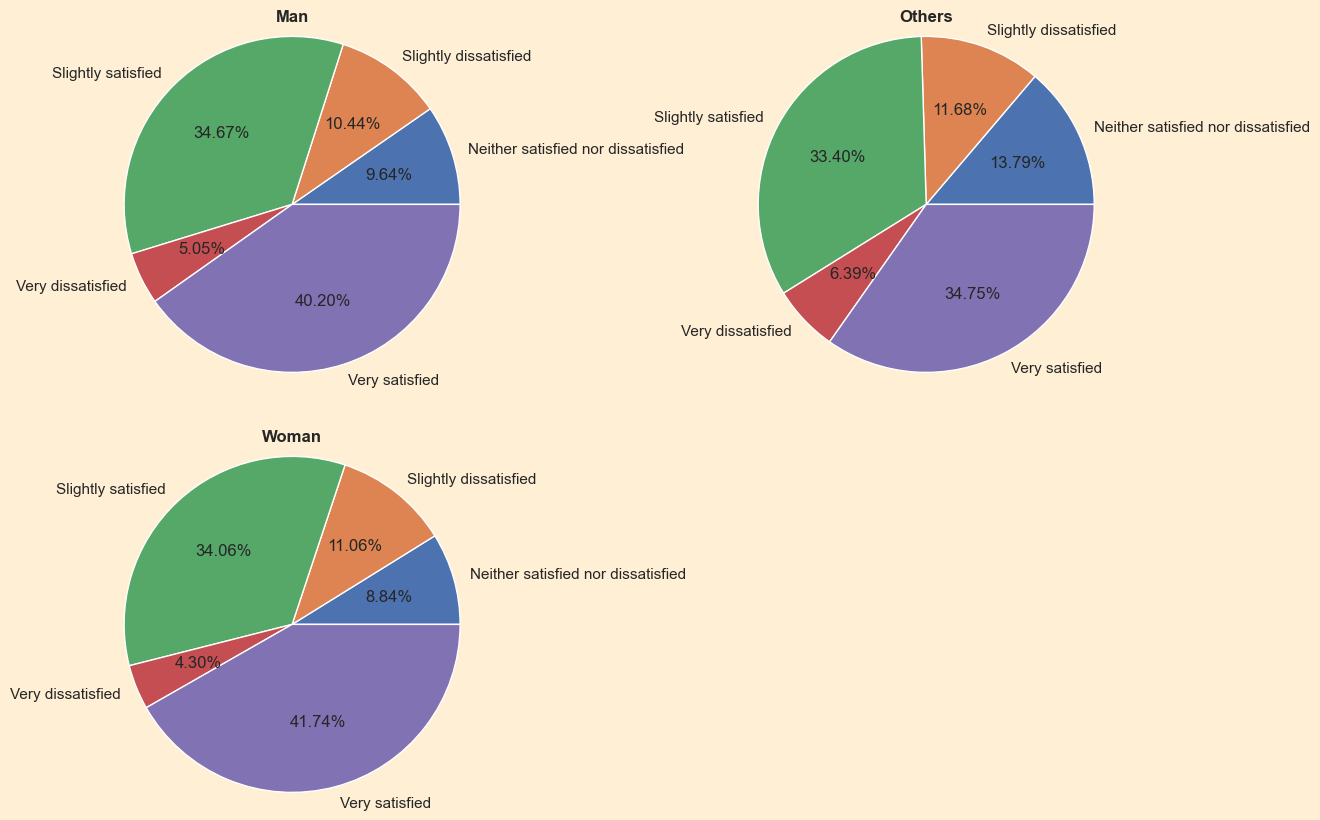

In [44]:
plt.subplots(figsize=(15,10))
p = 1
c = car_sat.index
for i in car_sat.columns:
    plt.subplot(2,2,p)
    plt.pie(car_sat.loc[:,i],labels = c,autopct='%.2f%%',radius=1.2)
    plt.title(f"{i}",fontweight="bold")
    p+=1
    plt.savefig("pie_car_sat.png")
    ;

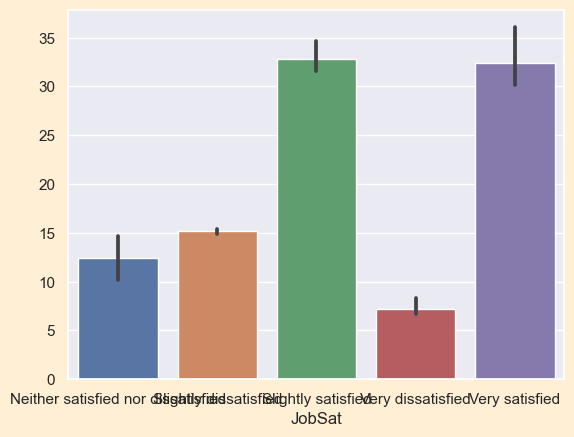

In [45]:
sns.barplot(data=job_sat.T,hue=);

In [61]:
# 1. Set up multiple variables to store the titles, text within the report
page_title_text='My report on Job and Career satisfaction'
title_text = 'Report for job and career satisfaction of developers based on their gender'
text = 'Hello, welcome to your report!'
table_1_text = 'Gender wise Precent of Job Satisfaction'
table_2_text = 'Gender wise Precent of Career Satisfaction'
#stats_text = 'Historical prices summary statistics'


# 2. Combine them together using a long f-string
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <h2>{table_1_text}</h2>
            
            {job_sat.to_html()}
            <img src='pie_job_sat.png' width="900">
            <h2>{table_2_text}</h2>
            
            {car_sat.to_html()}
            <img src='pie_car_sat.png' width="900">
            <img src='barplot_job.png' width="900">
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
with open('html_job_sat_report.html', 'w') as f:
    f.write(html)

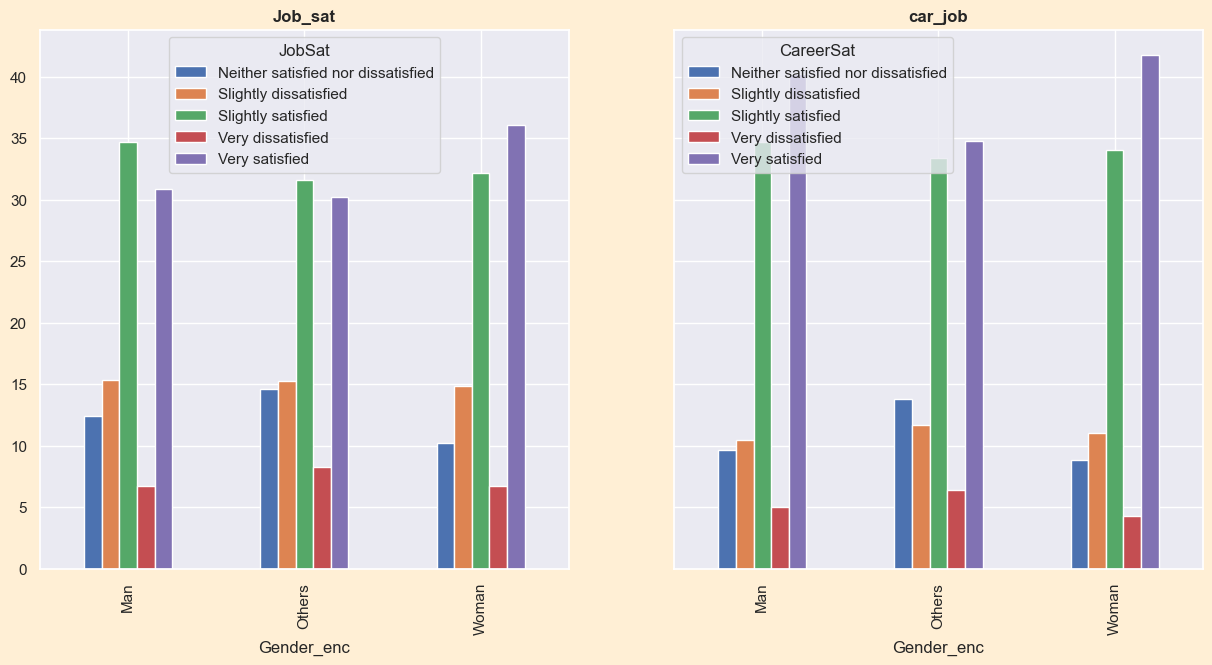

In [59]:
fig , ax = plt.subplots(1,2,figsize=(15,7),sharey=True)
plt.subplot(1,2,1)
job_sat.T.plot.bar(ax = ax[0])
plt.title("Job_sat",fontweight="bold")
plt.subplot(1,2,2)
car_sat.T.plot.bar(ax = ax[1])
plt.title("car_job",fontweight="bold")
plt.savefig('barplot_job.png');

# Data Manipulation Problem

In [10]:
import json
import mysql.connector

In [8]:
with open("sample_data_for_assignment.json",encoding="utf8") as j:
    json_data = json.load(j)

In [13]:
json_data['cols']

['name',
 'phone',
 'email',
 'address',
 'region',
 'country',
 'list',
 'postalZip',
 'currency']

In [57]:
mydb = mysql.connector.connect(host = 'localhost',
                        user = "root",
                        password = "Data@grokr",
                        database = "dml",
                        buffered = False)
cur = mydb.cursor()

In [39]:
# Creating sql table " json_to_sql_table "
cur.execute("create table json_to_sql_table(names varchar(50),phone varchar(50),email varchar(50),address varchar(255),region varchar(50),country varchar(50),list int,postalZip varchar(15),currency varchar(50));")

In [40]:
# inserting the values into the table 
for i in json_data['data']:
    cur.execute("insert into json_to_sql_table values (%s,%s,%s,%s,%s,%s,%s,%s,%s)",i)
mydb.commit()

### 1. unload the data from MySQL to pandas dataframe

In [58]:
def get_table(cur):
    row = cur.fetchone()
    while row is not None:
        yield row
        row = cur.fetchone()
        

cur.execute('select * from json_to_sql_table')
json_df = DF(columns=(json_data['cols']))
for i,r in enumerate(get_table(cur)):
    json_df.loc[i,:] = r

In [59]:
json_df

,name,phone,email,address,region,country,list,postalZip,currency
0,Winifred Branch,1-251-583-4993,in.mi@protonmail.com,Ap #530-5652 Arcu. Rd.,Rio de Janeiro,Nigeria,19,66242-403,$14.59
1,Brielle Davidson,1-632-583-7386,venenatis.lacus@hotmail.ca,Ap #630-7765 Molestie Avenue,Aisén,Australia,13,18317,$56.16
2,Summer Mcfadden,1-716-949-4663,orci.in@yahoo.com,"P.O. Box 410, 6638 Sed Avenue",Biobío,Belgium,3,85K 8W1,$36.45
3,Geoffrey Long,(116) 475-4598,placerat.eget.venenatis@protonmail.edu,783-9358 Aliquet Street,North Sulawesi,United States,1,28826,$69.58
4,Barry Conner,(491) 267-4372,lorem@hotmail.com,795 Mauris Rd.,Vaupés,China,7,335049,$77.68
...,...,...,...,...,...,...,...,...,...
495,Adrian Rodriquez,1-425-958-2315,non.quam.pellentesque@hotmail.net,107-4830 Lobortis Avenue,Noord Brabant,Russian Federation,1,49343,$90.17
496,Sonia Lamb,1-814-767-3340,suscipit.est@yahoo.com,8062 Lectus St.,Kurgan Oblast,Sweden,9,393741,$56.21
497,Kylee Silva,1-196-572-3426,nibh.lacinia@icloud.ca,Ap #336-1000 Diam Street,Drenthe,Vietnam,5,70801,$63.16
498,Jeanette Todd,1-384-486-3954,nunc@google.net,Ap #680-5749 Neque Avenue,Chandigarh,Ireland,9,3765 TK,$43.01


### 2. write a program to display all data under their respective column name as a pandas dataframe

In [60]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       500 non-null    object
 1   phone      500 non-null    object
 2   email      500 non-null    object
 3   address    500 non-null    object
 4   region     500 non-null    object
 5   country    500 non-null    object
 6   list       500 non-null    object
 7   postalZip  500 non-null    object
 8   currency   500 non-null    object
dtypes: object(9)
memory usage: 55.2+ KB


### 3. write a program to change all email address to have the format - abc@gmail.com (note the ending should be gmail.com)

In [61]:
import re

In [79]:
pattern = re.compile('@.*')
json_df['Email'] = json_df.email.apply(lambda x : re.sub(pattern,'@gmail.com',x))
#re.sub(pattern,'@gmail.com',"venenatis.lacus@hotmail.ca")
json_df.head()

,name,phone,email,address,region,country,list,postalZip,currency,Email
0,Winifred Branch,1-251-583-4993,in.mi@protonmail.com,Ap #530-5652 Arcu. Rd.,Rio de Janeiro,Nigeria,19,66242-403,$14.59,in.mi@gmail.com
1,Brielle Davidson,1-632-583-7386,venenatis.lacus@hotmail.ca,Ap #630-7765 Molestie Avenue,Aisén,Australia,13,18317,$56.16,venenatis.lacus@gmail.com
2,Summer Mcfadden,1-716-949-4663,orci.in@yahoo.com,"P.O. Box 410, 6638 Sed Avenue",Biobío,Belgium,3,85K 8W1,$36.45,orci.in@gmail.com
3,Geoffrey Long,(116) 475-4598,placerat.eget.venenatis@protonmail.edu,783-9358 Aliquet Street,North Sulawesi,United States,1,28826,$69.58,placerat.eget.venenatis@gmail.com
4,Barry Conner,(491) 267-4372,lorem@hotmail.com,795 Mauris Rd.,Vaupés,China,7,335049,$77.68,lorem@gmail.com


### 4. The values for "postalZip" doesn't have same type of data (some are string, some are int, some are alpha numeric). Write a program to convert all values to int. In case of alpha numeric remove the letters and keep only the numbers and convert it to int.

In [95]:
al = re.compile('[^0-9]')
json_df['Pincode'] = json_df.postalZip.apply(lambda x : re.sub(al,'',x))
json_df['Pincode'] = json_df.Pincode.astype("int64")
json_df.head()

,name,phone,email,address,region,country,list,postalZip,currency,Email,Pincode
0,Winifred Branch,1-251-583-4993,in.mi@protonmail.com,Ap #530-5652 Arcu. Rd.,Rio de Janeiro,Nigeria,19,66242-403,$14.59,in.mi@gmail.com,66242403
1,Brielle Davidson,1-632-583-7386,venenatis.lacus@hotmail.ca,Ap #630-7765 Molestie Avenue,Aisén,Australia,13,18317,$56.16,venenatis.lacus@gmail.com,18317
2,Summer Mcfadden,1-716-949-4663,orci.in@yahoo.com,"P.O. Box 410, 6638 Sed Avenue",Biobío,Belgium,3,85K 8W1,$36.45,orci.in@gmail.com,8581
3,Geoffrey Long,(116) 475-4598,placerat.eget.venenatis@protonmail.edu,783-9358 Aliquet Street,North Sulawesi,United States,1,28826,$69.58,placerat.eget.venenatis@gmail.com,28826
4,Barry Conner,(491) 267-4372,lorem@hotmail.com,795 Mauris Rd.,Vaupés,China,7,335049,$77.68,lorem@gmail.com,335049


### 5. write a separate function which take input data as values under the column name "phone" and processes it to return equivalent ASCII char of the value taken 2 at a time from left to right. Considering the value should be in between 65 to 99. If two-digit number is less than 65 replace it with O (O for Orange)

In [187]:
def code(num):
    al = re.compile('[^0-9]')
    num = re.sub(al,'',num)
    l = re.split('([0-9][0-9])',num)[1::2]
    l = list(map(int,l))
    asci = []
    
    for i in l:
        if i <65 or i > 99:
            asci.append('O')
        else:
            asci.append(chr(i))
    return ''.join(asci)

In [188]:
json_df['Coded_phone_number'] = json_df.phone.apply(code)
json_df.head()

,name,phone,email,address,region,country,list,postalZip,currency,Email,Pincode,Coded_phone_number
0,Winifred Branch,1-251-583-4993,in.mi@protonmail.com,Ap #530-5652 Arcu. Rd.,Rio de Janeiro,Nigeria,19,66242-403,$14.59,in.mi@gmail.com,66242403,OOOOc
1,Brielle Davidson,1-632-583-7386,venenatis.lacus@hotmail.ca,Ap #630-7765 Molestie Avenue,Aisén,Australia,13,18317,$56.16,venenatis.lacus@gmail.com,18317,OOOOO
2,Summer Mcfadden,1-716-949-4663,orci.in@yahoo.com,"P.O. Box 410, 6638 Sed Avenue",Biobío,Belgium,3,85K 8W1,$36.45,orci.in@gmail.com,8581,OO^^B
3,Geoffrey Long,(116) 475-4598,placerat.eget.venenatis@protonmail.edu,783-9358 Aliquet Street,North Sulawesi,United States,1,28826,$69.58,placerat.eget.venenatis@gmail.com,28826,OOKOb
4,Barry Conner,(491) 267-4372,lorem@hotmail.com,795 Mauris Rd.,Vaupés,China,7,335049,$77.68,lorem@gmail.com,335049,OOCOH


# XLSX to CSV file converter

In [192]:
import convertor
convertor.Convertor('Sample_Data - Python Assignment.xlsx','Office Supply Sales')

# SQL Information Extraction

In [81]:
import re
import json

In [42]:
sql = open('sample_stored_procedure.sql', mode='r').read()

In [43]:
statements = sql.split(';')
print(statements[0])

INSERT INTO VT_PDA_LU_TIME

SELECT PROMO_WEEK_ID AS WEEK_ID  

, NULL AS WEEK_ID_MINUS_1
, NULL AS PGM_PERIOD_ID
, NULL AS FISCAL_WEEK_ID
, NULL AS FISCAL_QUARTER_ID
, NULL AS UPDATE_TS_MT

FROM DW_DSS.LU_PROMO_DAY

WHERE DIVISION_ID = 25 

AND D_DATE = (
  SELECT D_DATE
  FROM DW_DSS.LU_DAY_MERGE
  WHERE WEEKDAY_NBR = 4  
  AND WEEK_ID = (
    SELECT WEEK_ID
    FROM DW_DSS.LU_DAY_MERGE
    WHERE D_DATE = CURRENT_DATE + 7  
    GROUP BY 1)
  GROUP BY 1)   

GROUP BY 1


In [82]:
json_list = []
count = 1
for statement in statements:
    t = (re.split('\n| |,', statement.strip()))
    x = [i for i in t if i]
    j = {}
    flage = 0
    for i,s in enumerate(x):
        if s == 'WHERE':
            flage=1
        if s in ['INSERT','UPDATE','CREATE','DELETE']:
            j['Statmentid']=count
            j['statement_type'] = s
        if s in ['FROM','JOIN'] and x[i+1] != '(' and flage != 1:
            if 'target_table_name' not in j.keys():
                j['target_table_name'] = [{"type":s,'name':[x[i+1]]}]
            else:
                j['target_table_name'][0]['name'].append(x[i+1])
    json_list.append(j)
    count +=1

In [91]:
with open('sql_extraction_output.json',"w") as jsonfile:
    json.dump(json_list,jsonfile, indent = 2)

In [93]:
statements[0]

'INSERT INTO VT_PDA_LU_TIME\n\nSELECT PROMO_WEEK_ID AS WEEK_ID  \n\n, NULL AS WEEK_ID_MINUS_1\n, NULL AS PGM_PERIOD_ID\n, NULL AS FISCAL_WEEK_ID\n, NULL AS FISCAL_QUARTER_ID\n, NULL AS UPDATE_TS_MT\n\nFROM DW_DSS.LU_PROMO_DAY\n\nWHERE DIVISION_ID = 25 \n\nAND D_DATE = (\n  SELECT D_DATE\n  FROM DW_DSS.LU_DAY_MERGE\n  WHERE WEEKDAY_NBR = 4  \n  AND WEEK_ID = (\n    SELECT WEEK_ID\n    FROM DW_DSS.LU_DAY_MERGE\n    WHERE D_DATE = CURRENT_DATE + 7  \n    GROUP BY 1)\n  GROUP BY 1)   \n\nGROUP BY 1'

In [94]:
re.split('\n| |,', statements[0].strip())

['INSERT',
 'INTO',
 'VT_PDA_LU_TIME',
 '',
 'SELECT',
 'PROMO_WEEK_ID',
 'AS',
 'WEEK_ID',
 '',
 '',
 '',
 '',
 '',
 'NULL',
 'AS',
 'WEEK_ID_MINUS_1',
 '',
 '',
 'NULL',
 'AS',
 'PGM_PERIOD_ID',
 '',
 '',
 'NULL',
 'AS',
 'FISCAL_WEEK_ID',
 '',
 '',
 'NULL',
 'AS',
 'FISCAL_QUARTER_ID',
 '',
 '',
 'NULL',
 'AS',
 'UPDATE_TS_MT',
 '',
 'FROM',
 'DW_DSS.LU_PROMO_DAY',
 '',
 'WHERE',
 'DIVISION_ID',
 '=',
 '25',
 '',
 '',
 'AND',
 'D_DATE',
 '=',
 '(',
 '',
 '',
 'SELECT',
 'D_DATE',
 '',
 '',
 'FROM',
 'DW_DSS.LU_DAY_MERGE',
 '',
 '',
 'WHERE',
 'WEEKDAY_NBR',
 '=',
 '4',
 '',
 '',
 '',
 '',
 'AND',
 'WEEK_ID',
 '=',
 '(',
 '',
 '',
 '',
 '',
 'SELECT',
 'WEEK_ID',
 '',
 '',
 '',
 '',
 'FROM',
 'DW_DSS.LU_DAY_MERGE',
 '',
 '',
 '',
 '',
 'WHERE',
 'D_DATE',
 '=',
 'CURRENT_DATE',
 '+',
 '7',
 '',
 '',
 '',
 '',
 '',
 '',
 'GROUP',
 'BY',
 '1)',
 '',
 '',
 'GROUP',
 'BY',
 '1)',
 '',
 '',
 '',
 '',
 'GROUP',
 'BY',
 '1']